<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/MNIST_Digit_classification_%5B0_to_9%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Import Library##

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [ ]:
tf.__version__

'2.9.2'

##2.Import Data##

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

##3.Data Understanding##

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(*args, **kw)>

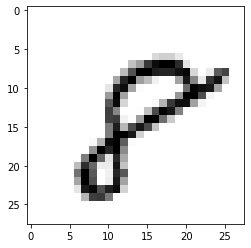

In [ ]:
plt.imshow(X=x_train[59999],cmap='binary')
plt.show

In [ ]:
y_train[59999]

8

<function matplotlib.pyplot.show(*args, **kw)>

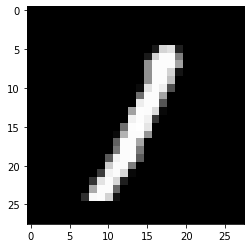

In [ ]:
plt.imshow(X=x_train[455],cmap='gist_gray')
plt.show

In [ ]:
y_train[455]

1

##4.Data preparation##

In [ ]:
x_train.std(), x_test.std()

(78.56748998339798, 79.17246322228644)

In [ ]:
x_train= x_train/255
x_test= x_test/255   

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train.std(), x_test.std()

(0.3081078038564622, 0.3104802479305348)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Applying one hot encoding for output features as we gonna use softmax AF as the output layer

In [ ]:
y_train_encoded = to_categorical(y=y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_train_encoded.shape

(60000, 10)

In [ ]:
x_train_reshape = x_train.reshape(x_train.shape[0],28,28,1)
x_test_reshape = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train_reshape.shape, x_test_reshape.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

##5.Model building##

###5.1 Building the architecture###

In [ ]:
from keras import Sequential
from keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=50,activation='relu')) #Hidden layer 1
model.add(Dense(units=30,activation='relu')) #Hidden layer 2
model.add(Dense(units=10,activation='softmax')) #Output layer 

###5.2 Model Compilation###

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

##6 Model Training##

In [ ]:
training= model.fit(x= x_train_reshape,y= y_train_encoded,batch_size = 32,epochs=10,validation_data=(x_test_reshape,y_test_encoded),validation_steps =len(y_test))

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3175 - accuracy: 0.9056

1875/1875 [==============================] - 15s 7ms/step - loss: 0.3169 - accuracy: 0.9058 - val_loss: 0.1791 - val_accuracy: 0.9448
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1455 - accuracy: 0.9568
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1085 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0892 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0643 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0484 - accuracy: 0.9844
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 10/10
1875/1875 [===========================

##7.Model Testing##

In [ ]:
evaluation_score = model.evaluate(x=x_test_reshape,y=y_test_encoded)

313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9714


In [ ]:
evaluation_score

[0.10531499981880188, 0.9714000225067139]

In [ ]:
print('Loss        =', evaluation_score[0])
print('Accuracy    =', evaluation_score[1])

Loss        = 0.10531499981880188
Accuracy    = 0.9714000225067139


##8.Model Prediction

<function matplotlib.pyplot.show(*args, **kw)>

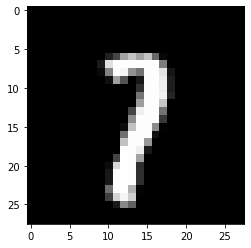

In [ ]:
plt.imshow(x_test_reshape[111].reshape(28,28),cmap='gray')
plt.show

In [ ]:
y_pred = model.predict(x_test_reshape)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
np.argmax(y_test_encoded[111])

7

In [ ]:
#End